<a href="https://colab.research.google.com/github/draglar/Titanic/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## Specifying the Data Analytic Question

> Clasify whether or not a passenger aboard the titanic survived

## Defining the Metric for Success

>  The model will be a success if i can atleast achieve an accuracy score of 80% when evaluating the model before making the last prediction on the test dataset

## Understanding the context 

Aah the titanic 
> The greatest ship of its time: 'Not even god can sink it'.😅 It sunk during its maiden voyage as it hit an iceberg. Alot of the passengers died.

* The question at hand wishes us to analyse the data of the passengers aboard the Titanic and look for insights on why some survived while the majority died

* One hypothesis is there were not enough lifeboats incase of an emergency, otherwise more if not all would have survived

## Recording the Experimental Design

* define the desired modeling algorithm( KNN)
* Select random subset for the algorith
* generate predictions and evaluate the performance
* re fit the model with a different subsets( 0.2,0.3,0.4 test sizes)

## Data Relevance

> The data is relevant to the question asked.

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
train=pd.read_csv('https://raw.githubusercontent.com/draglar/Titanic/main/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/draglar/Titanic/main/test.csv')
train.shape,test.shape

((891, 12), (418, 11))

# Previewing the dataset

* The top of the train dataset

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 * The top of the test dataset

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


* The bottom of the train dataset

In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* The bottom of the test dataset

In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


* Details on the train dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Details of the test dataset

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


> The only thing not in the Test dataset is the whether the passenger survived which is what were intended to predict

# External dataset validation

* Column details

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td>0 = Male , 1 = Female</td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

# Tidying the dataset

* Checking for null values

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

> * Cabin values will be droped since there is way too much null to be droped
  * The Two embarked null values can also be droped because they are quite insignificant
  * However i believe age could have been a deciding factor so missing age values will have to be filled

> The name and ticket colimns will also be droped since i doubt they had an impact on whether or not the passenger surved, Although Passenger id doues not also have an impact i will leave it so that it can be used to evaluate how accurate the model in predicting the test dataset 😁

In [ ]:
train.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
test.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [ ]:
train['Age'][train['Age'].isna()==True].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def fix(dfr):
  na=dfr['Age'][dfr['Age'].isna()==True].index
  df=pd.concat([train,test])
  for ind in na:
    # ind=dfr['Age'].index
    sx=dfr['Sex'].iloc[ind]
    pcl=dfr['Pclass'].iloc[ind]
    par=dfr['Parch'].iloc[ind]
    mn=(df['Age'][(df['Sex']==sx)&(df['Pclass']==pcl)&(df['Parch']==par)]).mean()
    dfr['Age'].iloc[ind]=mn
fix(train)
fix(test)

> I filled the null age values with people who met the same criteria ( Were of the same gender, were in the same class and had the same number of parents / children aboard the Titanic) in both the train and test dataset.

In [ ]:
train.dropna(inplace=True)
test.dropna(inplace=True)

> I droped the remaining null values

In [ ]:
train.duplicated().sum(),test.duplicated().sum()

(0, 0)

> No duplicates were found

* checking to see if any outliers were left

In [ ]:
ag=(train['Age'].astype('int'))
ags=np.arange(ag.min(),ag.max(),10)
print(ags)
def grups(x):
  if x<10:
    return 0
  elif (x>=10)&(x<20):
    return 1
  elif (x>=20)&(x<30):
    return 2
  elif (x>=30)&(x<40):
    return 3
  elif (x>=40)&(x<50):
    return 4
  elif (x>=50)&(x<60):
    return 5
  elif (x>=60)&(x<70):
    return 6
  else:
    return 7
train['age_group']=train.apply(lambda x:grups(x['Age']),axis=1)
test['age_group']=test.apply(lambda x:grups(x['Age']),axis=1)

[ 0 10 20 30 40 50 60 70]


> I created 8 age groups

In [ ]:
f=(train['Fare'].astype('int'))
fare=f.min(),f.max()
print(fare)
def grups(x):
  if x<100:
    return 0
  elif (x>=100)&(x<200):
    return 1
  elif (x>=200)&(x<300):
    return 2
  elif (x>=300)&(x<400):
    return 3
  elif (x>=400)&(x<500):
    return 4
  else:
    return 5

train['fare_group']=train.apply(lambda x:grups(x['Fare']),axis=1)
test['fare_group']=test.apply(lambda x:grups(x['Fare']),axis=1)

(0, 512)


> I created  fare groups

In [ ]:
df=pd.concat([train,test])

* Checking for any outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


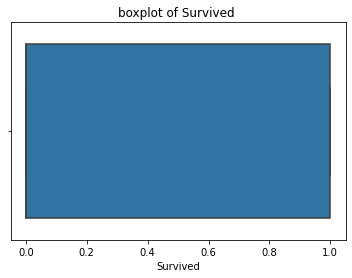

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


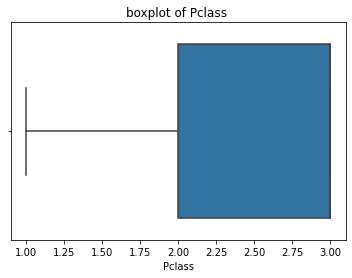

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


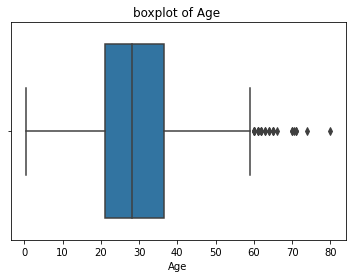

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


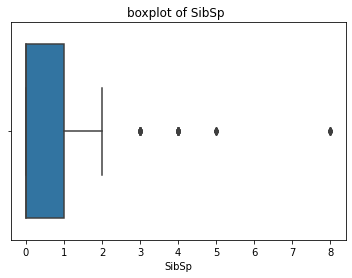

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


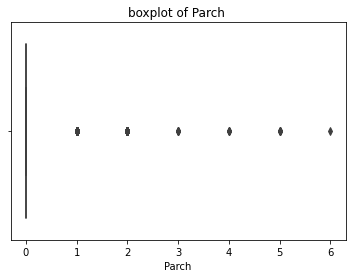

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


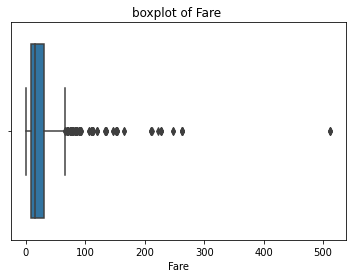

In [ ]:
for name in ['Survived','Pclass','Age','SibSp','Parch','Fare']:
  plt.title(f'boxplot of {name} ')
  sns.boxplot(train[name])
  plt.show()

> A few outliers in the age column, this could be as a result of those on the titanic were diverse in terms of age

* No outliers were removed

# Eda

## univarriate

In [ ]:
sns.set(rc={'figure.figsize':(18,6)},style="white")

> Setting the size and style of my seaborn plots

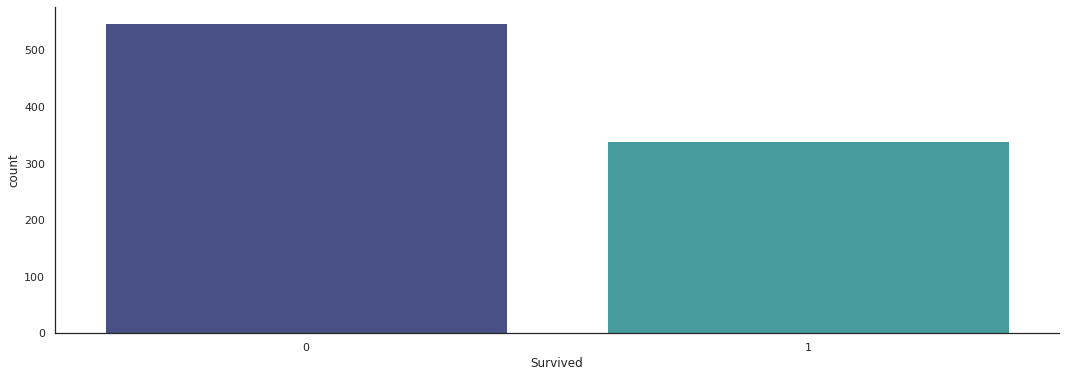

In [ ]:
sns.countplot(x='Survived',data=train,palette='mako')
sns.despine()

> Most people died

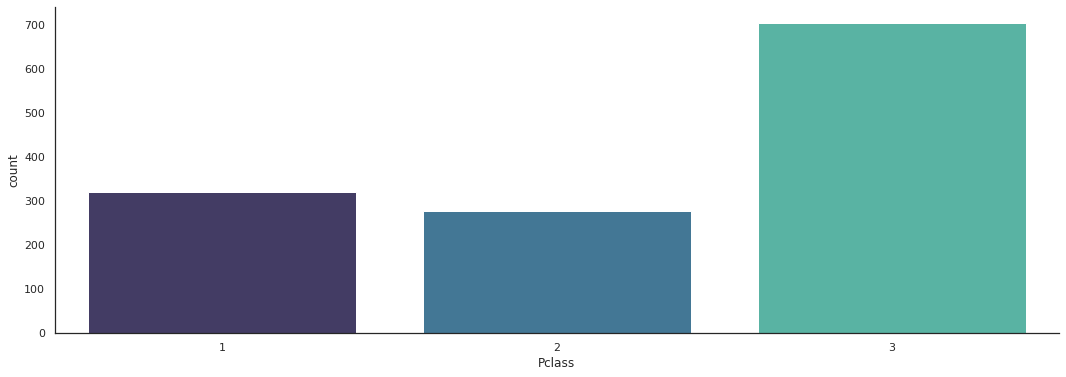

In [ ]:
sns.countplot(x='Pclass',data=df,palette='mako')
sns.despine()

> Alot of the people aboard were in third class

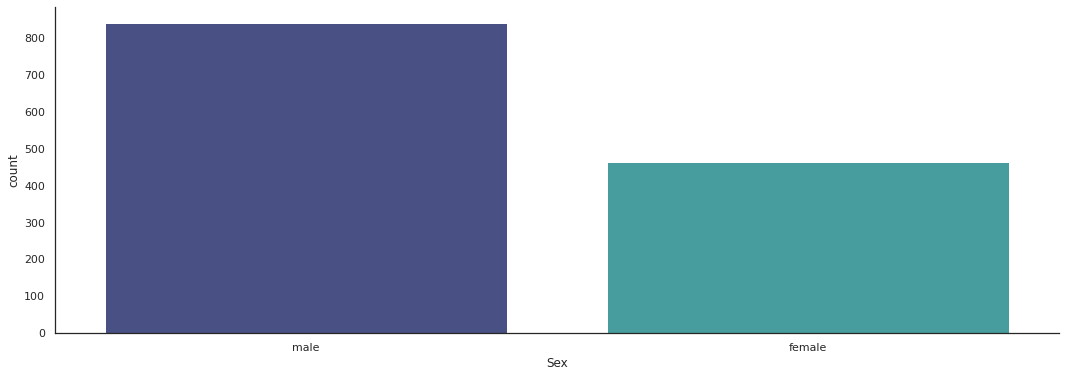

In [ ]:
sns.countplot(x='Sex',data=df,palette='mako')
sns.despine()

> Most aboard the ship were male

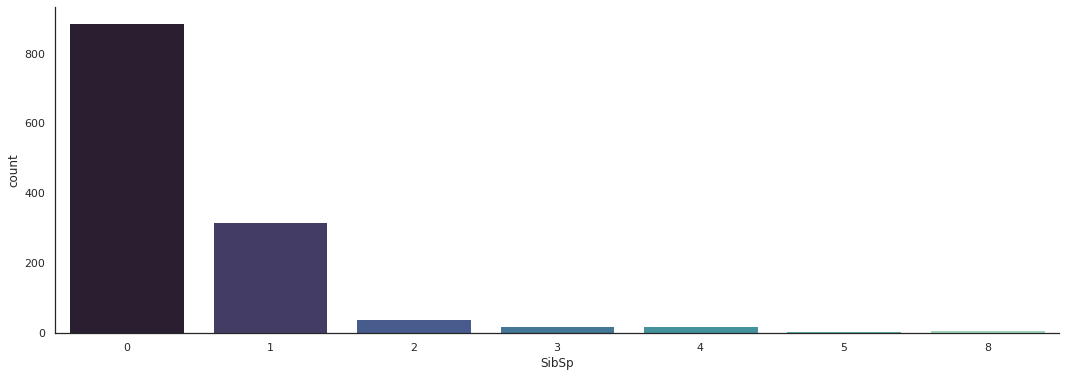

In [ ]:
sns.countplot(x='SibSp',data=df,palette='mako')
sns.despine()

> Most people had no siblings or spouse

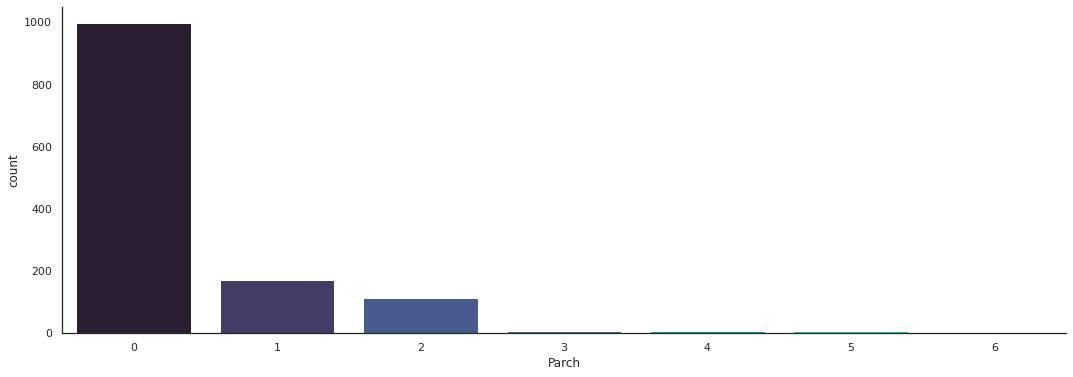

In [ ]:
sns.countplot(x='Parch',data=df,palette='mako')
sns.despine()

> Most people had no parents or children aboard

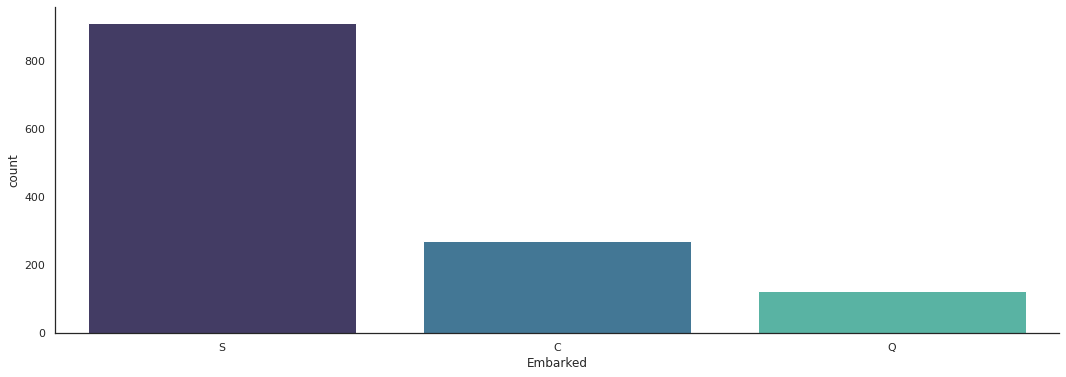

In [ ]:
sns.countplot(x='Embarked',data=df,palette='mako')
sns.despine()

> Most people emberked from southampton

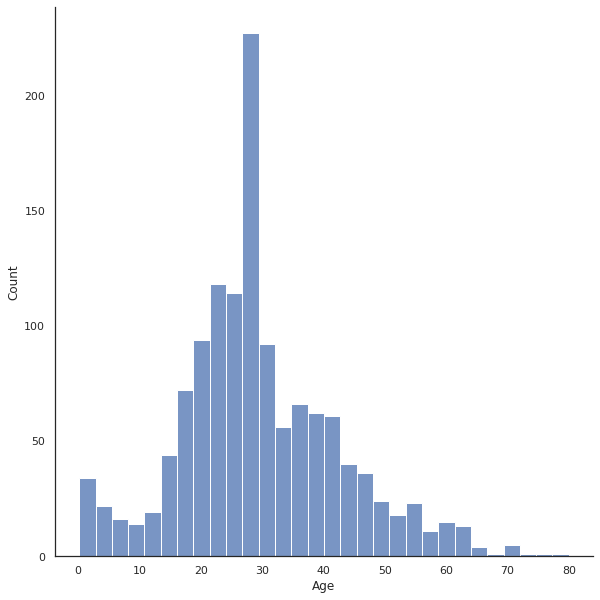

In [ ]:
sns.displot(df['Age'],height=8.5)
sns.despine()

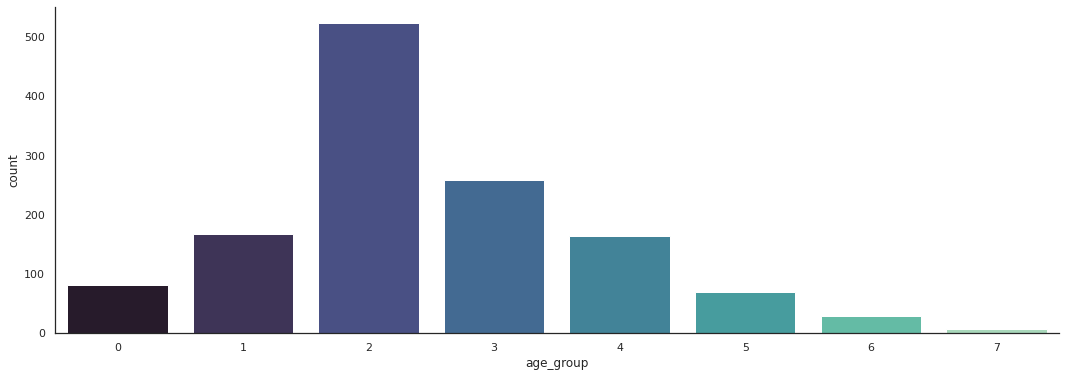

In [ ]:
sns.countplot(x='age_group',data=df,palette='mako')
sns.despine()

> Most people were aged between 20 and 30 years

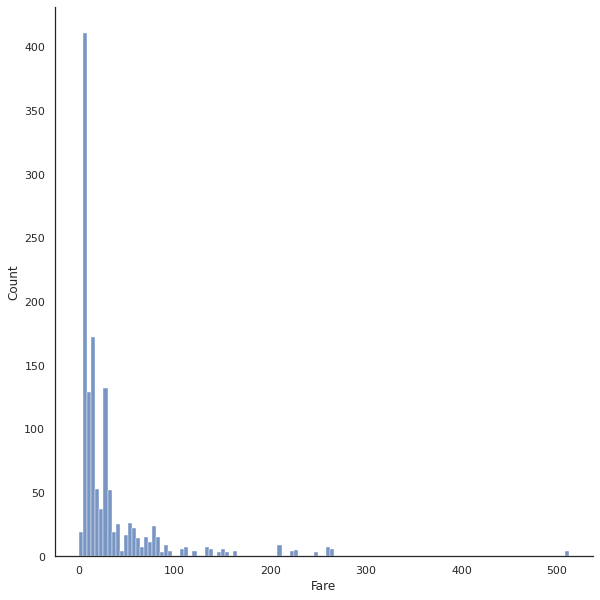

In [ ]:
sns.displot(df['Fare'],palette='mako',height=8.5)
sns.despine()

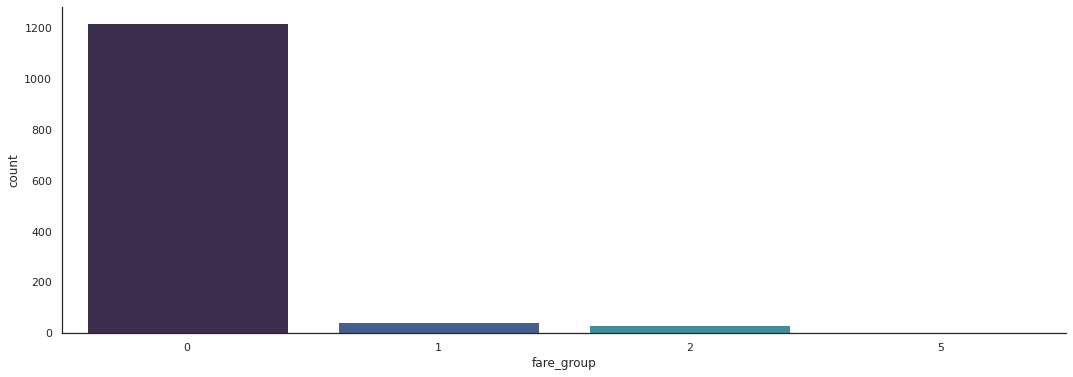

In [ ]:
sns.countplot(x='fare_group',data=df,palette='mako')
sns.despine()

> Very few people paid above the normal price

## bivarriate

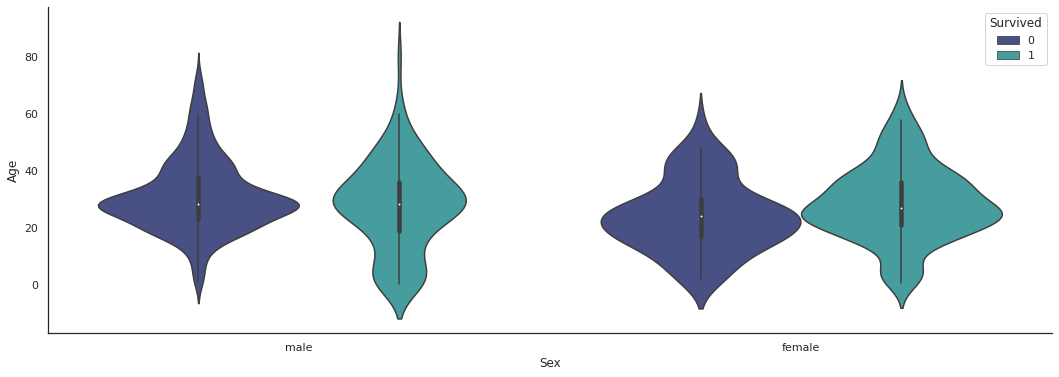

In [ ]:
sns.violinplot(y='Age',x='Sex',hue='Survived',data=train,palette='mako')
sns.despine()

> most of the people who survived ranged between 30 and 40 years

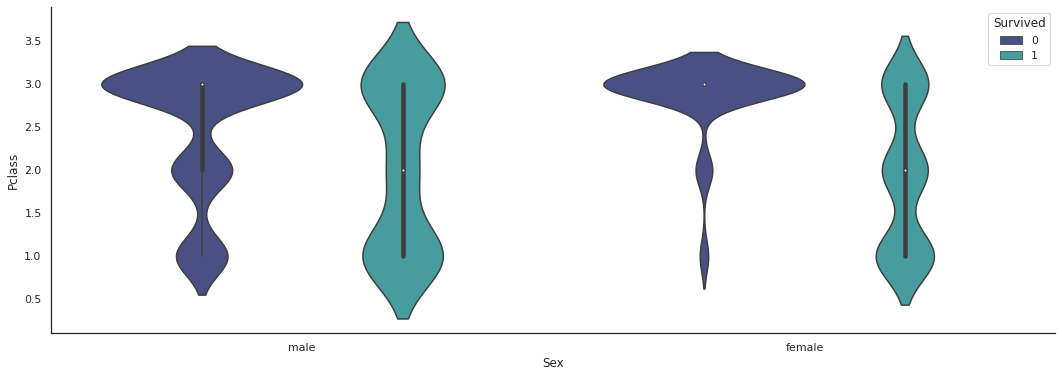

In [ ]:
sns.violinplot(y='Pclass',x='Sex',hue='Survived',data=train,palette='mako')
sns.despine()

> It seems class had an impact on whether or not you survived
* More males died from the different classes , however most of the first class passengers survived
* More females from the first and second class survived compared to those who died

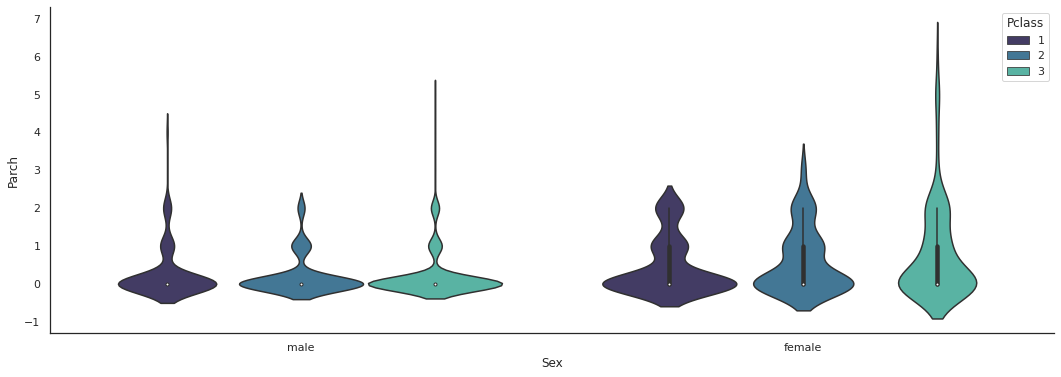

In [ ]:
sns.violinplot(y='Parch',x='Sex',hue='Pclass',data=train,palette='mako')
sns.despine()

> While more people had no parents or children aboard

* Females generally had more compared to men , in the different clases

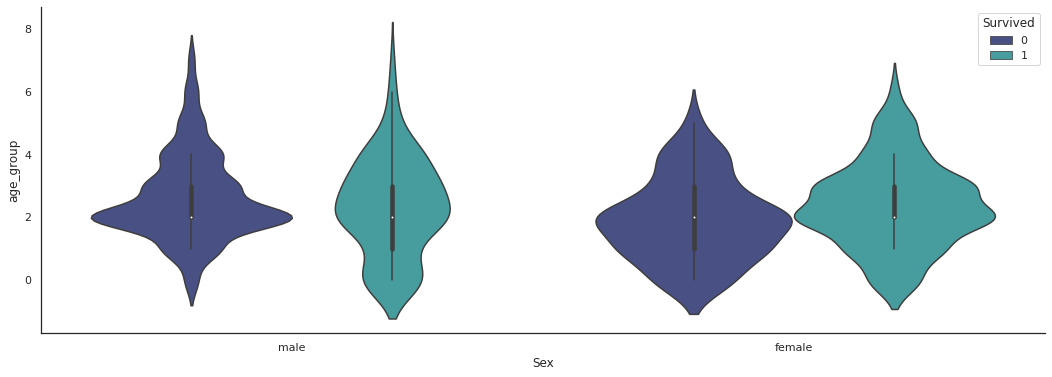

In [ ]:
sns.violinplot(y='age_group',x='Sex',hue='Survived',data=train,palette='mako')
sns.despine()

In [ ]:
train['Survived']=train['Survived'].astype('category')

In [ ]:
fig = px.scatter(
    data_frame=train,
    x="Fare",
    y="Age", 
    size="Pclass", 
    color="Survived",
    hover_data=['PassengerId','Sex','Age', 'Fare'],
    hover_name='Name',
    size_max=20
)
fig.show()

> More of the passengers who paid alot of money ended up surviving the crash, They may have been in first class and generallr ranged between 20 and 50 years

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])
test['Sex']=le.fit_transform(test['Sex'])
test['Embarked']=le.fit_transform(test['Embarked'])

> Gender
* Male=1
* Female=0


> Embarked
* C=0
* Q=1
* S=2

In [ ]:
fig = px.scatter(
    data_frame=train, 
    x="Age",
    y="Fare", 
    animation_frame="Embarked", 
    size="Pclass", 
    color="Survived",
    hover_data=['PassengerId','Sex','Age', 'Fare'],
    hover_name='Name',
    size_max=25,  
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=train, 
    x="Fare",
    y="Age", 
    animation_frame="Sex", 
    size="Pclass", 
    color="Survived",
    hover_data=['PassengerId','Sex','Age', 'Fare'],
    hover_name='Name',
    size_max=25, 
)
fig.show()

In [ ]:
fig = px.scatter(
    data_frame=train, 
    x="Fare",
    y="Age", 
    animation_frame="age_group", 
    animation_group="Pclass",
    size="Pclass", 
    color="Survived",
    hover_data=['PassengerId','Sex','Age', 'Fare'],
    hover_name='Name',
    # facet_col="Continent",
    size_max=45,
    category_orders={'fare_group':list(range(0,7))}     
)
fig.show()

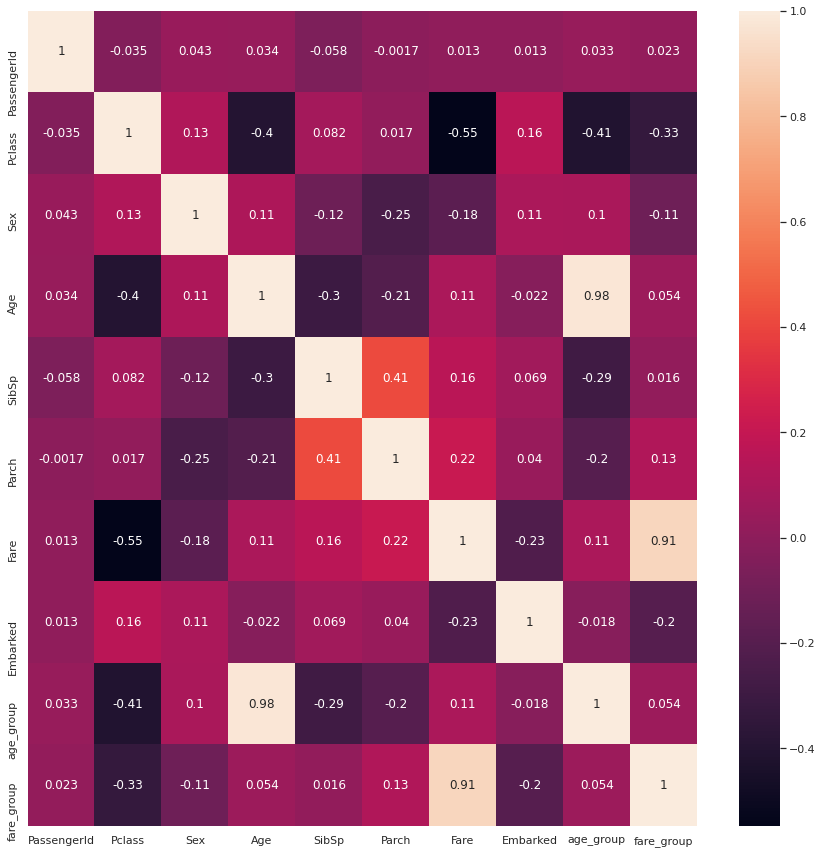

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(),annot=True)

> The derived columns are highly correlated to their original columns since they were derived froom them.

>The number of siblings or spouse is gighly correlated to the number of paarents or children

In [ ]:
ts=list((test.drop(['PassengerId','Age','Fare'],axis=1)).columns)

for name in ts:
  train[name]=train[name].astype('category')
  test[name]=test[name].astype('category')

In [ ]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Sex          889 non-null    category
 4   Age          889 non-null    float64 
 5   SibSp        889 non-null    category
 6   Parch        889 non-null    category
 7   Fare         889 non-null    float64 
 8   Embarked     889 non-null    category
 9   age_group    889 non-null    category
 10  fare_group   889 non-null    category
dtypes: category(8), float64(2), int64(1)
memory usage: 36.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  415 non-null    int64   
 1   Pclass       415 non-null    cate

(None, None)

# Implementing the solution

* Importing the libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

* Getting important fearures  using random forest

In [ ]:
x=train.drop(['PassengerId','Survived',],axis=1)
y=train['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
max=np.arange(1,10)
est=np.arange(100,1000,100)
grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':est,'max_depth':max})
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

The best parameters  {'max_depth': 9, 'n_estimators': 300}


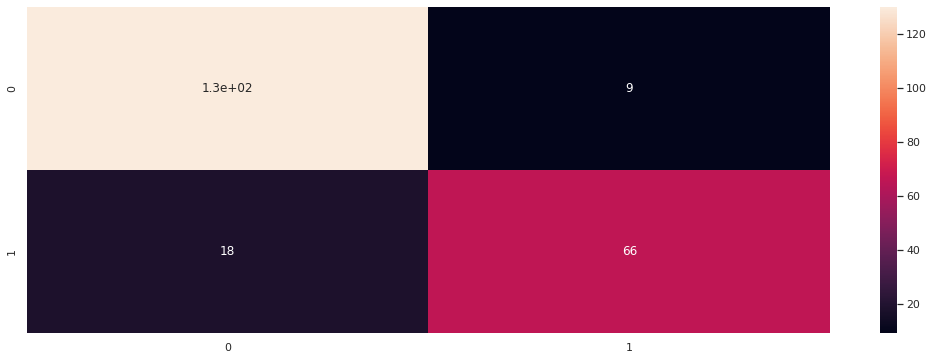

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       139
           1       0.88      0.79      0.83        84

    accuracy                           0.88       223
   macro avg       0.88      0.86      0.87       223
weighted avg       0.88      0.88      0.88       223



In [148]:
rforest = RandomForestClassifier(n_estimators=300, max_depth=9)
rforest = rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test) 
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> 88 % accuracy from the random forest tree

In [149]:
importance = pd.DataFrame({'feature': list(x_train.columns),
                           'importance': rforest.feature_importances_},index=None).sort_values('importance', ascending = False)
importance

,feature,importance
1,Sex,0.321492
5,Fare,0.200485
2,Age,0.170080
0,Pclass,0.109816
7,age_group,0.059868
3,SibSp,0.047772
6,Embarked,0.042187
4,Parch,0.035544
8,fare_group,0.012757


> I picked the 4 most impportant feaatures for the dataset.

In [165]:
x=train[['Sex','Fare','Age','Pclass']]
y=train['Survived']

* Looking for the best parameters for the KNN models using grid search

In [151]:
from sklearn.model_selection import GridSearchCV
n=np.arange(1,100)
w=['uniform','distance']
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':n,'metric':['euclidean','manhattan','minkowski'],'weights':w})
grid.fit(x,y)
print('The best parameters ',grid.best_params_)

The best parameters  {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


* This is the best value for the datset, hence will be used in all upcoming test

## KNN at 20% test size

* creating test and train sets

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [167]:
classifier = KNeighborsClassifier(n_neighbors=8,metric='manhattan',weights='distance')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

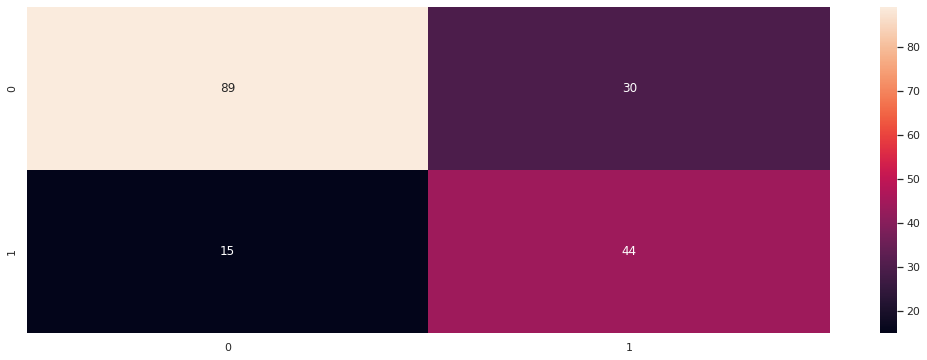

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       119
           1       0.59      0.75      0.66        59

    accuracy                           0.75       178
   macro avg       0.73      0.75      0.73       178
weighted avg       0.77      0.75      0.75       178



In [168]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> THis is the base model accuracy: 75%

> predicting those who dies with a precision of 0.86 and those who survived : 0.59

1. Scaling data

In [169]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [170]:
classifier = KNeighborsClassifier(n_neighbors=8,metric='manhattan',weights='distance')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

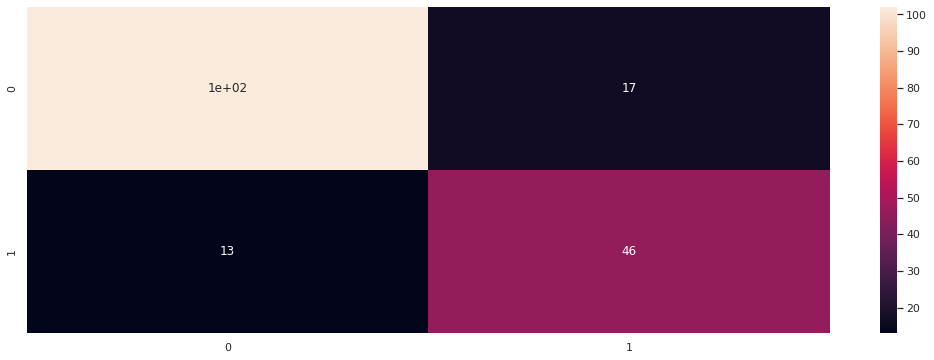

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       119
           1       0.73      0.78      0.75        59

    accuracy                           0.83       178
   macro avg       0.81      0.82      0.81       178
weighted avg       0.83      0.83      0.83       178



In [171]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> Scaling the data yields a higher accuracy: 0.83

and
> predicting those who dies with a precision of 0.89 and those who survived : 0.73

2. Normalizing the data

In [ ]:
Normalizer().get_params().keys()

dict_keys(['copy', 'norm'])

In [172]:
normalizer = Normalizer(norm='max')
x=normalizer.transform(x)

> since the normaliser norm has 3 attributes (‘l1’, ‘l2’, or ‘max’) , i did them one by one to see how each faired and max had the highest accuracy. It also works best with the default value for the copy attribute

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [174]:
classify = KNeighborsClassifier(n_neighbors=8,metric='manhattan',weights='distance')
classify.fit(x_train, y_train)
y_pred = classify.predict(x_test)

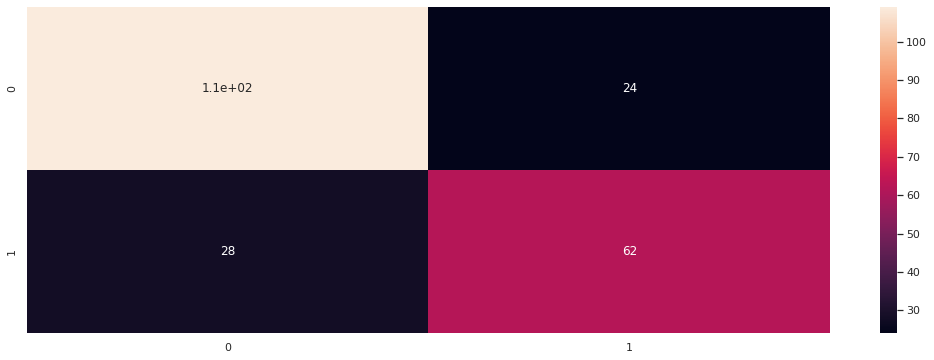

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       133
           1       0.72      0.69      0.70        90

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.76       223
weighted avg       0.77      0.77      0.77       223



In [175]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> normalizing ended up with a lower accuracy: 0.77 compared to scaling the data.
* Scaling works best on the dataset, therefore normalisation will not be used at any other point beyond here

## KNN at 30% test size

In [176]:
x=train[['Sex','Fare','Age','Pclass']]
y=train['Survived']

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [182]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [183]:
classify = KNeighborsClassifier(n_neighbors=8,metric='manhattan',weights='distance')
classify.fit(x_train, y_train)
y_pred = classify.predict(x_test)

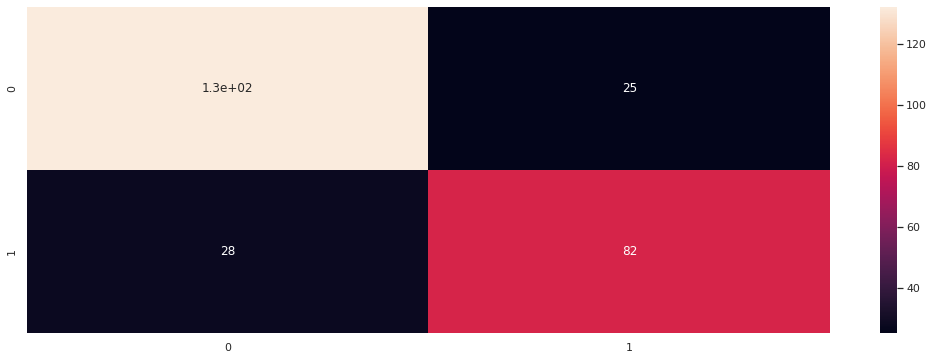

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       110

    accuracy                           0.80       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [184]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> The accuracy droped a bit (0.80) from the test size at 20% (0.83)

* correlaed

In [ ]:
df=x.copy()
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df.drop(df[to_drop], axis=1,inplace=True)
df.shape,x.shape

((889, 4), (889, 4))

> There was no change in the feature selection by removing highly correlated values, it would therefore not improve the accuracy of the model, It could be because i got the best features to use in the model.

## KNN at 40% test size

In [185]:
x=train[['Sex','Fare','Age','Pclass']]
y=train['Survived']

In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [191]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [192]:
classify = KNeighborsClassifier(n_neighbors=8,metric='manhattan',weights='distance')
classify.fit(x_train, y_train)
y_pred = classify.predict(x_test)

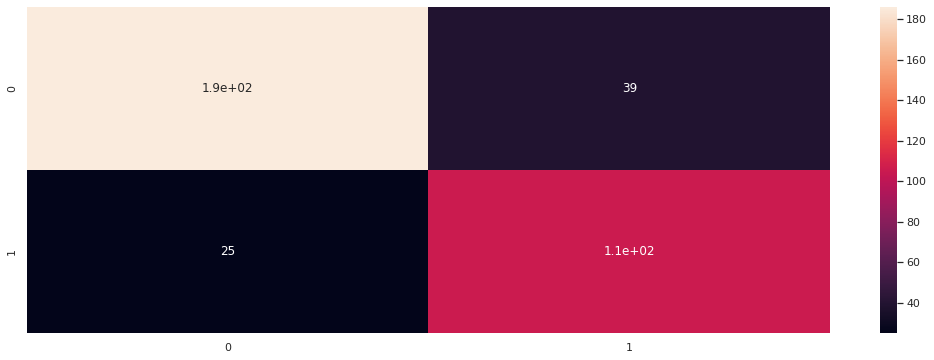

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       225
           1       0.73      0.81      0.77       131

    accuracy                           0.82       356
   macro avg       0.81      0.82      0.81       356
weighted avg       0.83      0.82      0.82       356



In [193]:
confused=metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confused,annot=True)
plt.show()
print(metrics.classification_report(y_test, y_pred))

> The accuracy at 0.2 test size is still the highest (0.83)

## Finalizing

In [194]:
x=train[['Sex','Fare','Age','Pclass']]
y=train['Survived']
tst=test[['Sex','Fare','Age','Pclass']]

In [195]:
scaler = StandardScaler()
scaler.fit(x_train)

x = scaler.transform(x)
tst = scaler.transform(tst)

In [196]:
classify = KNeighborsClassifier(n_neighbors=24,metric='manhattan',weights='distance')
classify.fit(x,y)
test['Survive_?']= classify.predict(tst)
final=test[['PassengerId','Survive_?']]
final

,PassengerId,Survive_?
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [197]:
test['Survive_?'].value_counts()

0    272
1    143
Name: Survive_?, dtype: int64

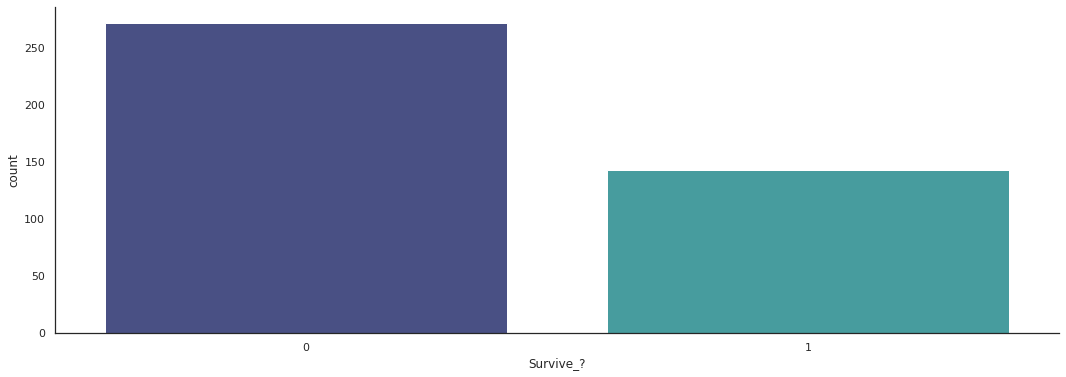

In [198]:
sns.countplot(x='Survive_?',data=test,palette='mako')
sns.despine()

> 😅 so many people died, take care when you get on a Ship

# Challenging the solution

> The highes accuracy i got from the in the models was 83% meaning the classsifications have a 20 % chance of being misclassified.

* Other classification models, could probably have a better accuracy for instance a the decision tree i used to get the features. There is alot left to try out.






# Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



## Did we have the right data?

Yes. The data was complete

## Do we need other data to answer our question?

No, the data was complete to answer the question.

## Did we have the right question?

Yes, the question was appropriate for the data provided